In [1]:
import numpy as np
import pandas as pd

In [2]:
mov = pd.read_csv('../input/movies.csv')

In [3]:
mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
mov.tail()

,movieId,title,genres
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy
9124,164979,"Women of '69, Unboxed",Documentary


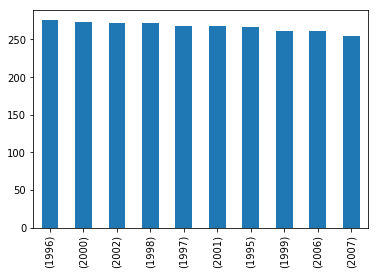

In [5]:
mov['title'].apply(lambda d: str(d)[-6:]).value_counts().sort_values(ascending=False).head(10).plot.bar()

In [6]:
mov['genres'] = mov['genres'].str.split('|')

In [7]:
mov['genres'].head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

In [8]:
mov = mov.explode('genres')

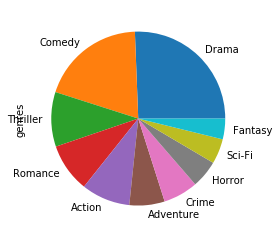

In [9]:
mov['genres'].value_counts().head(10).plot.pie()

In [10]:
mov['year'] = mov['title'].apply(lambda d:str(d)[-6:])

In [11]:
mov['year'] = mov['year'].apply(lambda d: [i for i in d if i.isdigit()])

In [12]:
for i in mov['year']:
    mov['year'] = ''.join(i)

In [13]:
mov

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure,1995
0,1,Toy Story (1995),Animation,1995
0,1,Toy Story (1995),Children,1995
0,1,Toy Story (1995),Comedy,1995
0,1,Toy Story (1995),Fantasy,1995
...,...,...,...,...
9121,163056,Shin Godzilla (2016),Fantasy,1995
9121,163056,Shin Godzilla (2016),Sci-Fi,1995
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1995
9123,164977,The Gay Desperado (1936),Comedy,1995


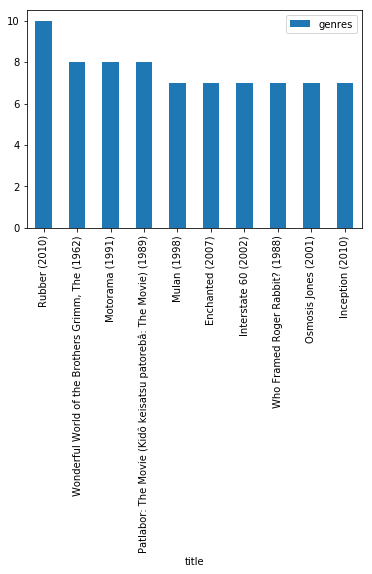

In [14]:
mov.groupby('title').agg({'genres':'count'}).sort_values(by='genres',ascending=False).head(10).plot.bar()